## کتابخانه های مورد استفاده

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
Input_path='./EMG-data.csv'

## بارگذاری دادگان و اضافه کردن هدر

In [2]:
dataset = pd.read_csv(Input_path)
print(dataset.shape)

# Check for any null/empty values
print("\nEmpty values:", dataset.isnull().any().sum())

# Define the header for the data
header = ['time', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'class', 'label']

# Add the header to the dataset
dataset.columns = header

# Print the updated dataset
print(dataset.head())



(4237906, 11)

Empty values: 0
   time      channel1  channel2  channel3  channel4  channel5      channel6  \
0     5 -3.164276e-07  0.000010  0.000023  0.000010  0.000013 -8.516675e-07   
1     6 -1.811397e-05  0.000037  0.000050  0.000036  0.000021 -1.064517e-05   
2     7 -1.637235e-05  0.000035  0.000046  0.000033  0.000020 -1.113199e-05   
3     8 -1.529799e-05  0.000033  0.000043  0.000030  0.000018 -1.228960e-05   
4     9 -1.489230e-05  0.000032  0.000039  0.000028  0.000016 -1.392010e-05   

       channel7  channel8  class  label  
0  8.176374e-07  0.000010      0      1  
1 -8.248224e-06  0.000027      0      1  
2 -7.793686e-06  0.000025      0      1  
3 -7.901087e-06  0.000024      0      1  
4 -8.511888e-06  0.000022      0      1  


## پاکسازی داده ها با حذف ستون های بلا استفاده

In [3]:
dataset=dataset.drop(columns=["time"])
Class = dataset["class"]
print(Class.unique())
print("Value Count :\n", dataset["class"].value_counts())

[0 1 2 3 4 5 6 7]
Value Count :
 class
0    2725156
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


## دسته بندی داده ها بر اساس برچسب ها برای استخراج ویژگی ها

In [4]:
dataset=dataset.groupby(['label','class'])

In [5]:
##functions for extracting sEMG features
def rms(data): ##root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def SSI(data): ##Simple Square Integral
    return np.sum(data**2,axis=0)

def abs_diffs_signal(data): ##absolute differential signal
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)

##function for returning an estimator class name 
def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [6]:
#feature extraction
dataset=dataset.agg(['min','max',rms,SSI,abs_diffs_signal,np.ptp])

In [7]:
dataset=dataset.reset_index()
dataset.head()

label class  channel1                                                 \
                    min       max       rms       SSI abs_diffs_signal   
0     1     0 -0.001246  0.001338  0.000120  0.001137         0.918665   
1     1     1 -0.000047  0.000055  0.000013  0.000001         0.014994   
2     1     2 -0.001251  0.000898  0.000196  0.000261         0.227934   
3     1     3 -0.001070  0.001188  0.000177  0.000229         0.199159   
4     1     4 -0.000172  0.000236  0.000050  0.000017         0.049243   

             channel2            ...  channel7                                 \
        ptp       min       max  ...       rms           SSI abs_diffs_signal   
0  0.002584 -0.001137  0.001505  ...  0.000112  9.898801e-04         0.893290   
1  0.000102 -0.000088  0.000081  ...  0.000010  6.709262e-07         0.012195   
2  0.002149 -0.000468  0.000379  ...  0.000202  2.763568e-04         0.219553   
3  0.002259 -0.001355  0.001331  ...  0.000072  3.848637e-05         0.079111   
4  0.000408 -0.000359  0.000292  ...  0.000107  7.865361e-05         0.101885   

             channel8                                                     \
        ptp       min       max       rms           SSI abs_diffs_signal   
0  0.002269 -0.001169  0.001197  0.000123  1.197011e-03         0.956098   
1  0.000062 -0.000039  0.000042  0.000010  7.639383e-07         0.012923   
2  0.001627 -0.000641  0.000538  0.000138  1.294359e-04         0.159983   
3  0.000629 -0.000745  0.000545  0.000151  1.679604e-04         0.164167   
4  0.000921 -0.000327  0.000376  0.000074  3.770579e-05         0.067639   

             
        ptp  
0  0.002366  
1  0.000080  
2  0.001178  
3  0.001290  
4  0.000703  

[5 rows x 50 columns]

# پیاده سازی طبقه بندهای مختلف

C:\Users\asus\AppData\Local\Temp\ipykernel_13408\3190141234.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  7  2  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  0 11  1  0]
 [ 0  0  0  0  1  5  0]
 [ 0  0  3  3  0  0  7]]
Accuracy: 0.84375


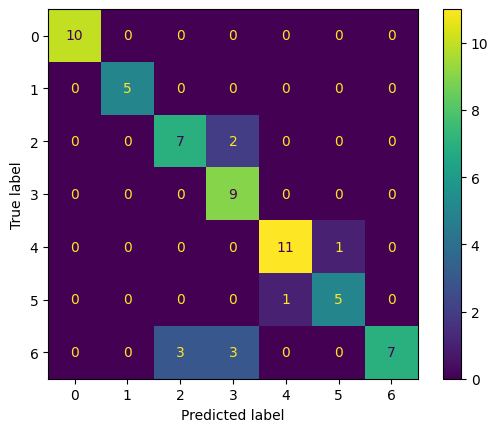

In [39]:
estimators=[]
accuracy=[]
svc=SVC(C=100,kernel='poly',gamma=0.01,decision_function_shape='ovo')
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
##Training and testing set splitting
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.25, random_state=1)
## Data normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
svc.fit(X_train,y_train)
y_test_pred=svc.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
print(conf_matrix)
estimators.append(print_estimator_name(svc))
accuracy.append(a)

# Displaying F1 score, confusion matrix, and accuracy
print("Accuracy:", accuracy[0])

# Visualizing confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_13408\3406846023.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  6  3  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  0 10  2  0]
 [ 0  1  0  0  0  5  0]
 [ 0  0  0  4  0  1  8]]
Accuracy: 0.828125


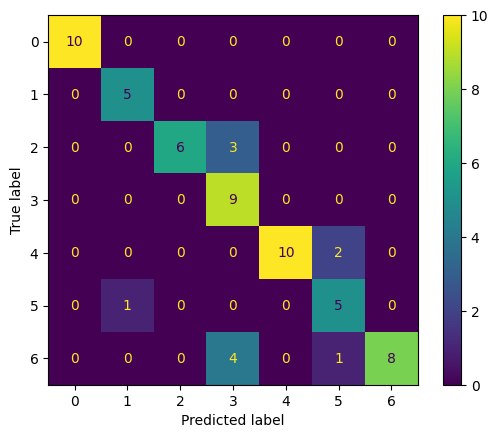

In [40]:
## Training KNN Classifier
knn=KNeighborsClassifier(metric='minkowski',algorithm= 'auto',n_neighbors=10,p=2,weights='distance',leaf_size=5)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.25, random_state=1)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
accuracy.append(a)
print(x)
estimators.append(print_estimator_name(knn))
print("Accuracy:", accuracy[1])
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_13408\452150209.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


[[9 0 1 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 0 8 1 0 0 0 0]
 [0 0 0 6 1 0 2 0]
 [1 0 2 0 8 1 0 0]
 [0 0 1 0 0 5 0 0]
 [1 0 0 2 0 0 8 2]
 [0 0 0 0 0 0 0 0]]
Accuracy: 0.765625


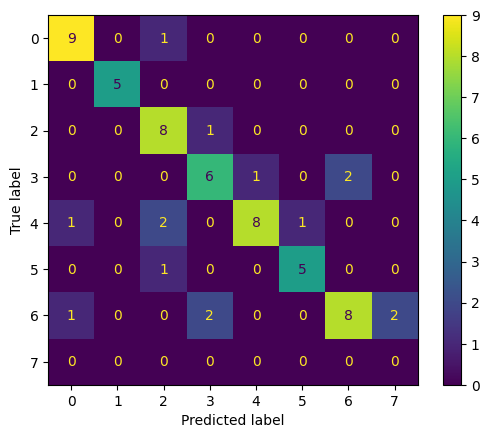

In [41]:
## Training Decision Tree Classifier
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 50, max_features= 5, max_leaf_nodes= 50,min_samples_split=2)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.25, random_state=1)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
dt.fit(X_train,y_train)
y_test_pred=dt.predict(X_test)
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
accuracy.append(a)
print(x)
print("Accuracy:", accuracy[2])
estimators.append(print_estimator_name(dt))
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_13408\67121329.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  1  7  0  0  1]
 [ 0  0  0  0  9  2  1]
 [ 0  1  0  0  0  5  0]
 [ 0  0  0  5  0  0  8]]
Accuracy: 0.828125


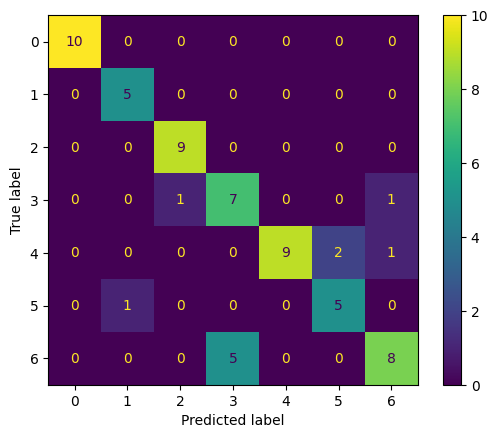

In [42]:
## Training Random Forest classifier
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 50, max_features= 5, max_leaf_nodes= 50,min_samples_split=2,n_estimators=2000,oob_score=True)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.25, random_state=1)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
rfc.fit(X_train,y_train)
y_test_pred=rfc.predict(X_test)
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
accuracy.append(a)
print(x)
print("Accuracy:", accuracy[3])
estimators.append(print_estimator_name(rfc))
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [43]:
estimators

['SVC',
 'KNeighborsClassifier',
 'DecisionTreeClassifier',
 'RandomForestClassifier']

In [45]:
for i in np.arange(len(estimators)):
    accuracy[i]=round(accuracy[i],3)

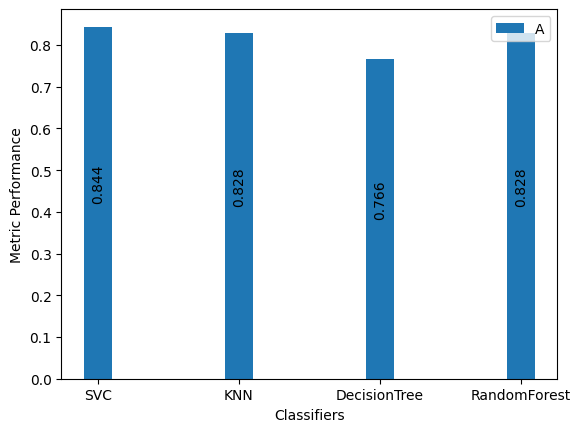

In [47]:
## plotting results of comparative study
estimators=['SVC','KNN','DecisionTree','RandomForest']
fig, ax = plt.subplots()
width=0.2
bar_plot1 = ax.bar(np.arange(len(estimators)),accuracy,width,tick_label=estimators)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Metric Performance')
ax.legend(('Accuracy'),loc='upper right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,height,ha='center', va='bottom', rotation=90)
autolabel(bar_plot1)
plt.show()